In [2]:
from common import *
from experiment import *
from heuristic import *
from data import DirectRawData, RawData, PlottableData
from typing import List, Tuple, Optional, Union, Dict

# Generate network settings from network_path_analysis.ipynb

In [5]:
NETWORK_SETTINGS = []
for s1, s2 in [
    # delay, loss, bw
    (NetworkModel(100, 0, 20), NetworkModel(1, 4, 20)),  # ASYMMETRIC_NEAR
    (NetworkModel(1, 4, 20), NetworkModel(100, 0, 20)),  # ASYMMETRIC_FAR
    (NetworkModel(100, 2, 20), NetworkModel(1, 2, 20)),  # ASYMMETRIC_BOTH_LOSSY
    (NetworkModel(40, 2, 40), NetworkModel(40, 2, 40)),  # SYMMETRIC_BOTH_LOSSY
]:
    ns = NetworkSetting(delay1=s1.delay, delay2=s2.delay, loss1=s1.loss, loss2=s2.loss, bw1=s1.bw, bw2=s2.bw)
    NETWORK_SETTINGS.append(ns)

# What data size should we collect for steady-state throughput?

In [7]:
def plot_data_size_vs_metric_line(data, delta, title, ylabel):
    plt.figure(figsize=(6, 4))
    
    labels = data.treatments
    assert len(data.network_settings) == 1
    network = data.network_settings[0]

    for label in labels:
        subdata = data.data[label][network]
        xs_raw = sorted(subdata.keys())
        ys_raw = [subdata[x] for x in xs_raw]

        xs = [x/1000 for x in xs_raw]
        ys = [y.p(50) for y in ys_raw]
        yerr_lower = [y.p(50) - y.p(50-delta) for y in ys_raw]
        yerr_upper = [y.p(50+delta) - y.p(50) for y in ys_raw]
        plt.errorbar(xs, ys, yerr=(yerr_lower, yerr_upper), marker='.', capsize=5, label=label)

    plt.title(title)
    plt.xlabel('Download Data Size (KB)')
    plt.ylabel(ylabel)
    plt.grid()
    plt.xlim(0)
    plt.ylim(0)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4)
    plt.show()

12
3.5562775135040283ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 1 --label tcp_cubic tcp -cca cubic -n 10000 
12.819409132003784ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 1 --label tcp_cubic tcp -cca cubic -n 20000 
2.1550233364105225ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 1 --label tcp_cubic tcp -cca cubic -n 50000 
2.886579751968384mulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 1 --label pep_cubic tcp --pep -cca cubic -n 10000 
1.9607856273651123ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 1 --label pep_cubic tcp --pep -cca cubic -n 20000 
3.1266446113586426ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 1 --label pep_cubic tcp --pep -cca cubic -n 50000 
1.7310876846313477ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 0 --loss2 4 -t 1 --label tcp_bb

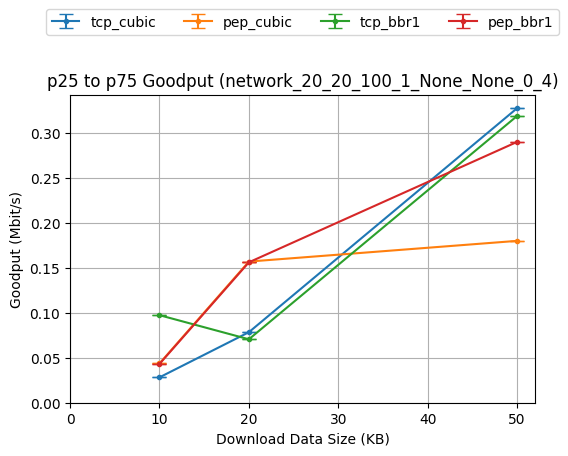

12
2.6647274494171143ulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 1 --label tcp_cubic tcp -cca cubic -n 10000 
4.02769660949707emulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 1 --label tcp_cubic tcp -cca cubic -n 20000 
2.4174675941467285ulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 1 --label tcp_cubic tcp -cca cubic -n 50000 
2.983327865600586mulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 1 --label pep_cubic tcp --pep -cca cubic -n 10000 
2.1648006439208984ulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 1 --label pep_cubic tcp --pep -cca cubic -n 20000 
3.399404764175415mulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 1 --label pep_cubic tcp --pep -cca cubic -n 50000 
22.62185764312744mulation/main.py --bw1 20 --bw2 20 --delay2 100 --loss1 4 --loss2 0 -t 1 --label tcp_bbr1 tcp -cca bbr -n 10000 
1.9322378635406494ulation/main.py --bw1 20 --bw2 20

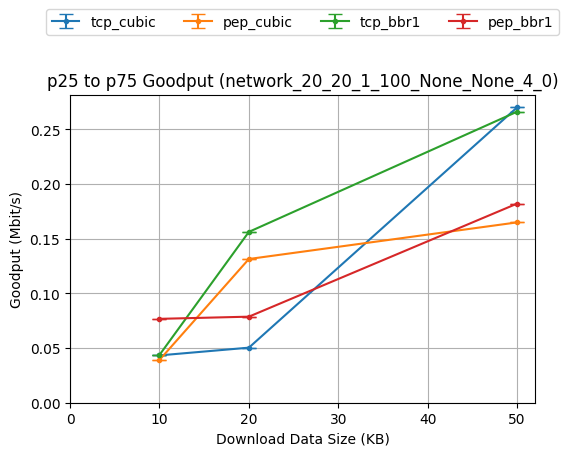

12
1.5900275707244873ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 1 --label tcp_cubic tcp -cca cubic -n 10000 
1.878131628036499mulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 1 --label tcp_cubic tcp -cca cubic -n 20000 
6.285128831863403mulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 1 --label tcp_cubic tcp -cca cubic -n 50000 
1.7629179954528809ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 1 --label pep_cubic tcp --pep -cca cubic -n 10000 
1.9666318893432617ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 1 --label pep_cubic tcp --pep -cca cubic -n 20000 
2.1231510639190674ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 1 --label pep_cubic tcp --pep -cca cubic -n 50000 
1.7246100902557373ulation/main.py --bw1 20 --bw2 20 --delay1 100 --delay2 1 --loss1 2 --loss2 2 -t 1 --label tcp_bb

In [ ]:
# Experiment settings
execute = True
num_trials = 1
treatments = [
    TCP_CUBIC, PEP_CUBIC, TCP_BBRV1, PEP_BBRV1,
    # TCP_BBRV2, PEP_BBRV2,
    # TCP_BBRV3, PEP_BBRV3,
]
network_settings = NETWORK_SETTINGS
data_sizes = [
    10000, 20000, 50000, # 10-99KB
    # 100000, 200000, 500000, # 100-999KB
    # 1000000, 2000000, 5000000, # 1-9MB
    # 10000000, 20000000, 50000000, # 10-99MB
    # 100000000, 200000000, 500000000, # 100-999MB
]

# Plotting settings
for network_setting in network_settings:
    exp = Experiment(num_trials, treatments, [network_setting], data_sizes)
    raw_data = RawData(exp, max_data_sizes = {
        'tcp_cubic': 10,
    }, execute=execute)

    delta = 25
    title = f'p{50-delta} to p{50+delta} Goodput ({network_setting.label()})'
    metric = 'throughput_mbps'
    ylabel = 'Goodput (Mbit/s)'
    plottable_data = PlottableData(raw_data, metric=metric)
    plot_data_size_vs_metric_line(plottable_data, delta=delta, title=title, ylabel=ylabel)

# Generate ground truth data